In [131]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, make_scorer
from sklearn.model_selection import GridSearchCV
from collections import Counter


import xgboost as xgb
import os

MODELOS A PROBAR CON LAS VARIABLES NORMALES EN PISTA (DECISION TREE, LINEAR REGRESION, RF, XGB, SUPER VECTOR CLASIFIER)
MODELOS A PROBAR CON LAS VARIABLES NORMALES EN GENERAL (DECISION TREE, LINEAR REGRESION, RF, XGB, SUPER VECTOR CLASIFIER)
HACER CROSS VALIDATION Y KFOLD
lo mismo pero quitando peores variables
HAY QUE HABLAR DE QUE SOLO HEMOS COGIDO ESTADISTICAS DE PARTIDO Y DESCARTANDO COSAS COMO DR Y MAS QUE HEMOS DESCARTADO

QUITAR AQUELLOS PARTIDOS DE LOS JUGADORES QUE HAN JUGADO MENOS DE 8 PARTIDOS

LO MISMO PERO AÑADIENDO ELOS

LO MISMO PERO AÑADIENDO MEDIAS DE VARIABLES PARECIDAS

LO MISMO PERO AÑADIENDO METRICAS Y QUE COJA MUCHOS HIPERPARAMETROS

AÑADIENDO TODAS



In [2]:
alias_nombres = {
    "Sinner J.": "Jannik Sinner",
    "Zverev A.": "Alexander Zverev",
    "Alcaraz C.": "Carlos Alcaraz",
    "Fritz T.": "Taylor Fritz",
    "Draper J.": "Jack Draper",
    "Djokovic N.": "Novak Djokovic",
    "Ruud C.": "Casper Ruud",
    "De Minaur A.": "Alex De Minaur",
    "Musetti L.": "Lorenzo Musetti",
    "Rune H.": "Holger Rune",
    "Medvedev D.": "Daniil Medvedev",
    "Paul T.": "Tommy Paul",
    "Shelton B.": "Ben Shelton",
    "Fils A.": "Arthur Fils",
    "Dimitrov G.": "Grigor Dimitrov",
    "Tiafoe F.": "Frances Tiafoe",
    "Rublev A.": "Andrey Rublev",
    "Cerundolo F.": "Francisco Cerundolo",
    "Tsitsipas S.": "Stefanos Tsitsipas",
    "Machac T.": "Tomas Machac",
    "Mensik J.": "Jakub Mensik",
    "Humbert U.": "Ugo Humbert",
    "Korda S.": "Sebastian Korda",
    "Khachanov K.": "Karen Khachanov",
    "Popyrin A.": "Alexei Popyrin",
    "Davidovich Fokina A.": "Alejandro Davidovich Fokina",
    "Auger-Aliassime F.": "Felix Auger Aliassime",
    "Shapovalov D.": "Denis Shapovalov",
    "Nakashima B.": "Brandon Nakashima",
    "Berrettini M.": "Matteo Berrettini",
    "Hurkacz H.": "Hubert Hurkacz",
    "Michelsen A.": "Alex Michelsen",
    "Baez S.": "Sebastian Baez",
    "Cobolli F.": "Flavio Cobolli",
    "Griekspoor T.": "Tallon Griekspoor",
    "Mpetshi Perricard G.": "Giovanni Mpetshi Perricard",
    "Arnaldi M.": "Matteo Arnaldi",
    "Lehecka J.": "Jiri Lehecka",
    "Muller A.": "Alexandre Muller",
    "Borges N.": "Nuno Borges",
    "Thompson J.": "Jordan Thompson",
    "Tabilo A.": "Alejandro Tabilo",
    "Monfils G.": "Gael Monfils",
    "Sonego L.": "Lorenzo Sonego",
    "Giron M.": "Marcos Giron",
    "Darderi L.": "Luciano Darderi",
    "Kecmanovic M.": "Miomir Kecmanovic",
    "Goffin D.": "David Goffin",
    "Martinez P.": "Pedro Martinez",
    "Bergs Z.": "Zizou Bergs",
    "Etcheverry T.": "Tomas Martin Etcheverry",
    "Halys Q.": "Quentin Halys",
    "Jarry N.": "Nicolas Jarry",
    "Diallo G.": "Gabriel Diallo",
    "Zhang Z.": "Zhizhen Zhang",
    "Bautista Agut R.": "Roberto Bautista Agut",
    "Fearnley J.": "Jacob Fearnley",
    "Bonzi B.": "Benjamin Bonzi",
    "Carballes Baena R.": "Roberto Carballes Baena",
    "Ugo Carabelli C.": "Camilo Ugo Carabelli",
    "Marozsan F.": "Fabian Marozsan",
    "Nishikori K.": "Kei Nishikori",
    "Comesana F.": "Francisco Comesana",
    "Djere L.": "Laslo Djere",
    "Fonseca J.": "Joao Fonseca",
    "Munar J.": "Jaume Munar",
    "Shang J.": "Juncheng Shang",
    "Bellucci M.": "Mattia Bellucci",
    "Dzumhur D.": "Damir Dzumhur",
    "Tien L.": "Learner Tien",
    "Altmaier D.": "Daniel Altmaier",
    "Medjedovic H.": "Hamad Medjedovic",
    "Yunchaokete B.": "Bu Yunchaokete",
    "Nishioka Y.": "Yoshihito Nishioka",
    "Rinderknech A.": "Arthur Rinderknech",
    "Bublik A.": "Alexander Bublik",
    "Safiullin R.": "Roman Safiullin",
    "Gaston H.": "Hugo Gaston",
    "Vukic A.": "Aleksandar Vukic",
    "Kovacevic A.": "Aleksandar Kovacevic",
    "Oconnell C.": "Christopher Oconnell",
    "Hijikata R.": "Rinky Hijikata",
    "Moutet C.": "Corentin Moutet",
    "Coric B.": "Borna Coric",
    "Van De Zandschulp B.": "Botic Van De Zandschulp",
    "Collignon R.": "Raphael Collignon",
    "Struff J.L.": "Jan Lennard Struff",
    "Walton A.": "Adam Walton",
    "Majchrzak K.": "Kamil Majchrzak",
    "Duckworth J.": "James Duckworth",
    "Norrie C.": "Cameron Norrie",
    "Kopriva V.": "Vit Kopriva",
    "De Jong J.": "Jesper De Jong",
    "Opelka R.": "Reilly Opelka",
    "Nardi L.": "Luca Nardi",
    "Mcdonald M.": "Mackenzie Mcdonald",
    "Shevchenko A.": "Alexander Shevchenko",
    "Carreno Busta P.": "Pablo Carreno Busta",
    "Navone M.": "Mariano Navone",
    "Basavareddy N.": "Nishesh Basavareddy"
}

In [3]:
# DATASETS A USAR

df_stats = pd.read_csv("stats_Hard3_con_Elo.csv")
#est lo normalizaremos si hace falta

df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')

df_partidos_masde10 = pd.read_csv("dataset_3hard_10partidos.csv", delimiter=';')


Transformacion a dataset para entrenamiento con merge de los jugadores

In [4]:
# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [6]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("Train/dataset_modelo3_variablesnormalesconELOyRK_train.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [117]:
# === Cargar dataset generado ===
df = pd.read_csv("Train/dataset_modelo3_variablesnormalesconELOyRK_train.csv")

# === Separar variables y objetivo ===
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']


MODELO DECISION TREE

Resultados del modelo Árbol de Decisión
Accuracy: 0.6481
F1 Score: 0.6885

Clasificación:
               precision    recall  f1-score   support

           0       0.50      0.74      0.60        19
           1       0.81      0.60      0.69        35

    accuracy                           0.65        54
   macro avg       0.65      0.67      0.64        54
weighted avg       0.70      0.65      0.66        54


Matriz de confusión:
 [[14  5]
 [14 21]]


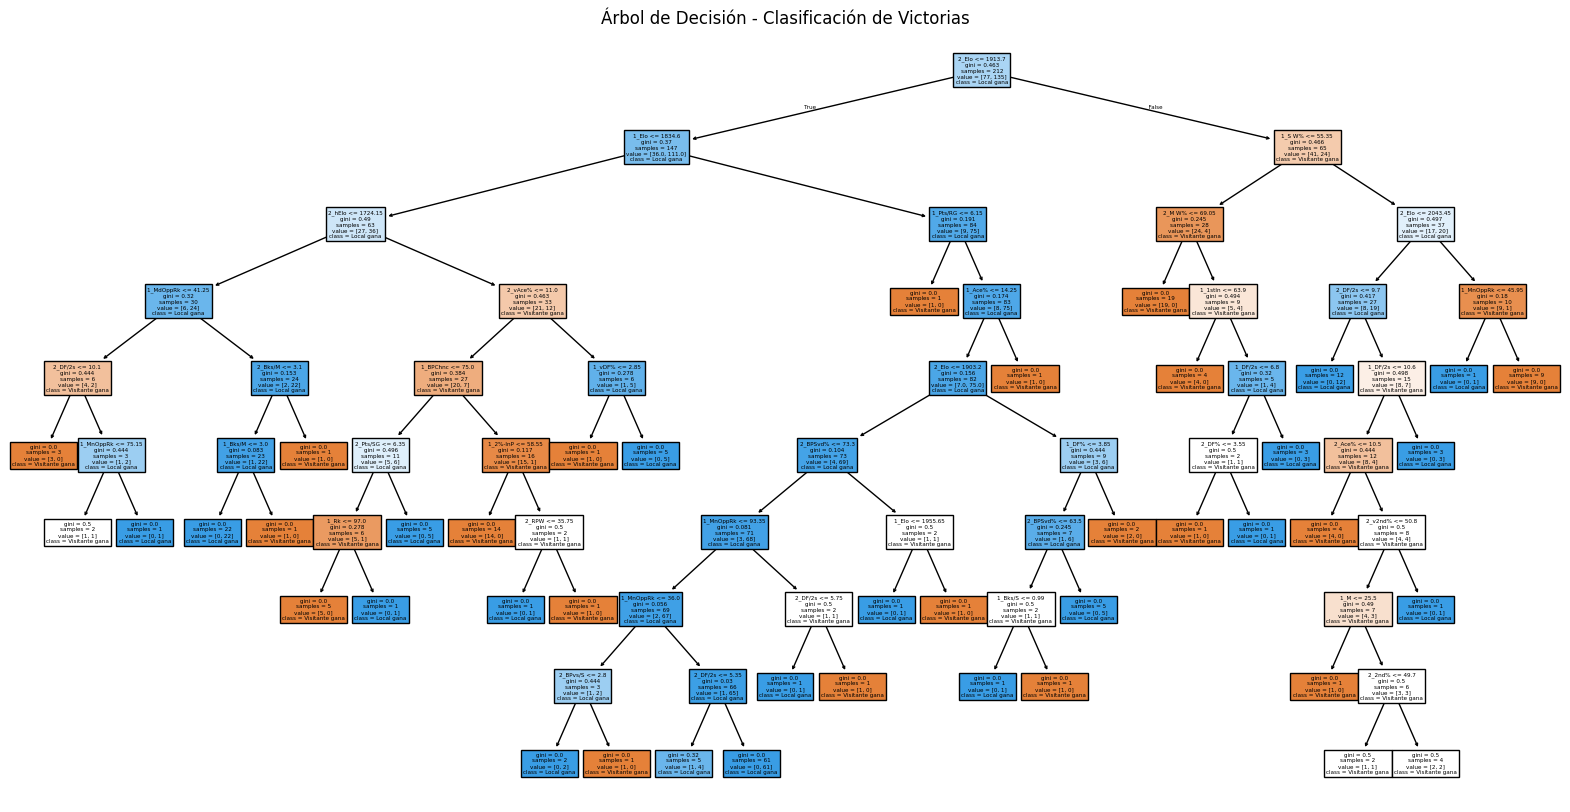

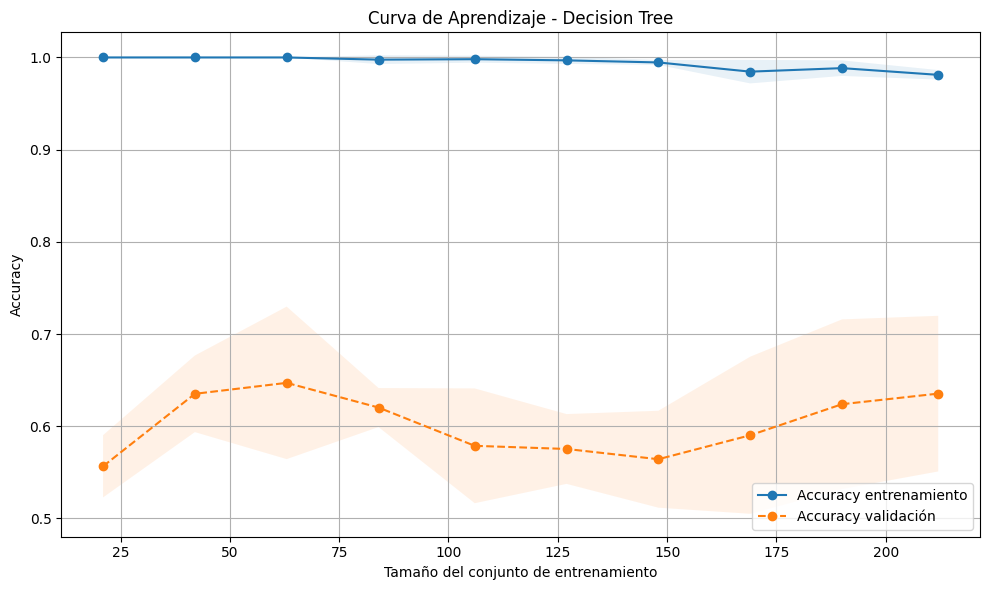

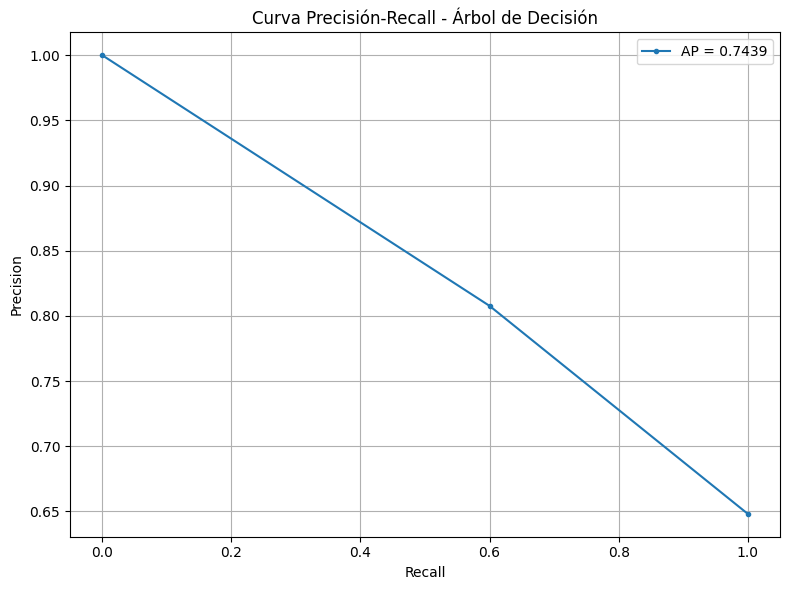

In [8]:
# === Cargar dataset generado ===
df_decision_tree = pd.read_csv("Train/dataset_modelo3_variablesnormalesconELOyRK_train.csv")

# === Separar variables y objetivo ===
X = df_decision_tree.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df_decision_tree['W_OR_L']

# === División en train y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === Entrenar modelo de árbol de decisión ===
dt = DecisionTreeClassifier(max_depth=9, random_state=42)
dt.fit(X_train, y_train)

# === Evaluar modelo ===
y_pred = dt.predict(X_test)
print("Resultados del modelo Árbol de Decisión")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("\nClasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# === Visualizar árbol ===
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Visitante gana', 'Local gana'], filled=True)
plt.title("Árbol de Decisión - Clasificación de Victorias")
plt.show()

# === CURVA DE APRENDIZAJE ===
train_sizes, train_scores, val_scores = learning_curve(
    dt, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === CURVA PRECISIÓN-RECALL ===
y_proba = dt.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall - Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
dt_acc = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
dt_f1 = cross_val_score(dt, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Árbol de Decisión")
print(f"   Accuracy promedio: {dt_acc.mean():.4f} ± {dt_acc.std():.4f}")
print(f"   F1 Score promedio: {dt_f1.mean():.4f} ± {dt_f1.std():.4f}")

🔹 Árbol de Decisión
   Accuracy promedio: 0.6319 ± 0.0495
   F1 Score promedio: 0.7108 ± 0.0414


MODELO REGRESION

Resultados del modelo Logistic Regression (con normalización):
Accuracy: 0.7407
F1 Score: 0.7407

=== Clasificación ===
              precision    recall  f1-score   support

           0     0.6316    0.6316    0.6316        19
           1     0.8000    0.8000    0.8000        35

    accuracy                         0.7407        54
   macro avg     0.7158    0.7158    0.7158        54
weighted avg     0.7407    0.7407    0.7407        54

=== Matriz de confusión ===
[[12  7]
 [ 7 28]]


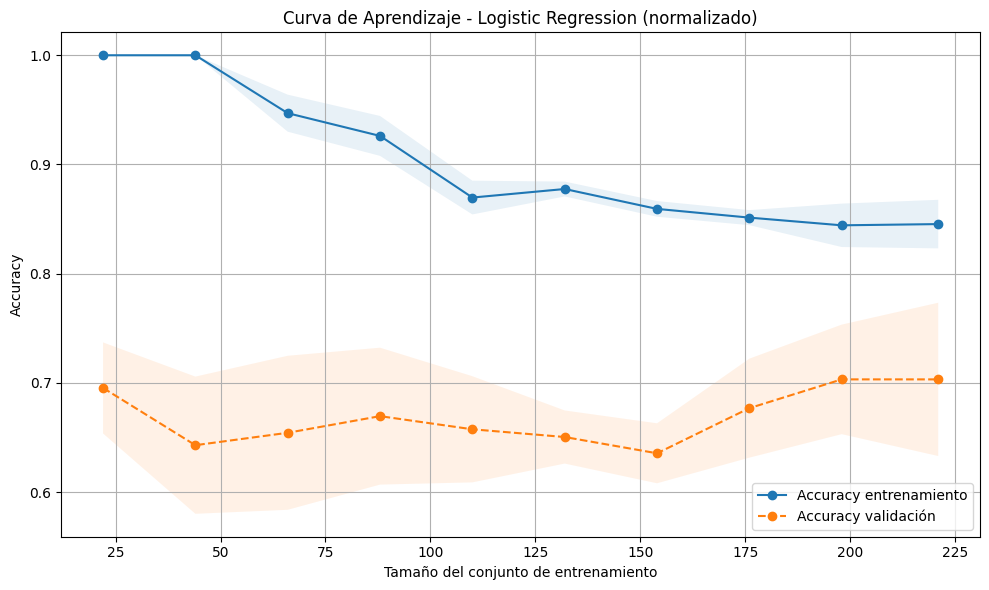

In [53]:
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Pipeline con normalización y regresión logística ===
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100, random_state=42)
)

# === Entrenamiento ===
lr_pipeline.fit(X_train, y_train)

# === Predicciones ===
y_pred = lr_pipeline.predict(X_test)

# === Evaluaciones ===
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo Logistic Regression (con normalización):")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    lr_pipeline, X, y, cv=6, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (normalizado)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
lr_acc = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')
lr_f1 = cross_val_score(lr_pipeline, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Regresión Logística")
print(f"   Accuracy promedio: {lr_acc.mean():.4f} ± {lr_acc.std():.4f}")
print(f"   F1 Score promedio: {lr_f1.mean():.4f} ± {lr_f1.std():.4f}")

🔹 Regresión Logística
   Accuracy promedio: 0.6992 ± 0.0727
   F1 Score promedio: 0.7718 ± 0.0557


la siguiente esta bien

Fitting 6 folds for each of 5 candidates, totalling 30 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7407
Test F1 Score: 0.7452
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.6087    0.7368    0.6667        19
           1     0.8387    0.7429    0.7879        35

    accuracy                         0.7407        54
   macro avg     0.7237    0.7398    0.7273        54
weighted avg     0.7578    0.7407    0.7452        54

=== Matriz de confusión ===
[[14  5]
 [ 9 26]]

Validación cruzada (cv=8):
Accuracy promedio: 0.7165 ± 0.0714
F1 Score promedio: 0.7101 ± 0.0688


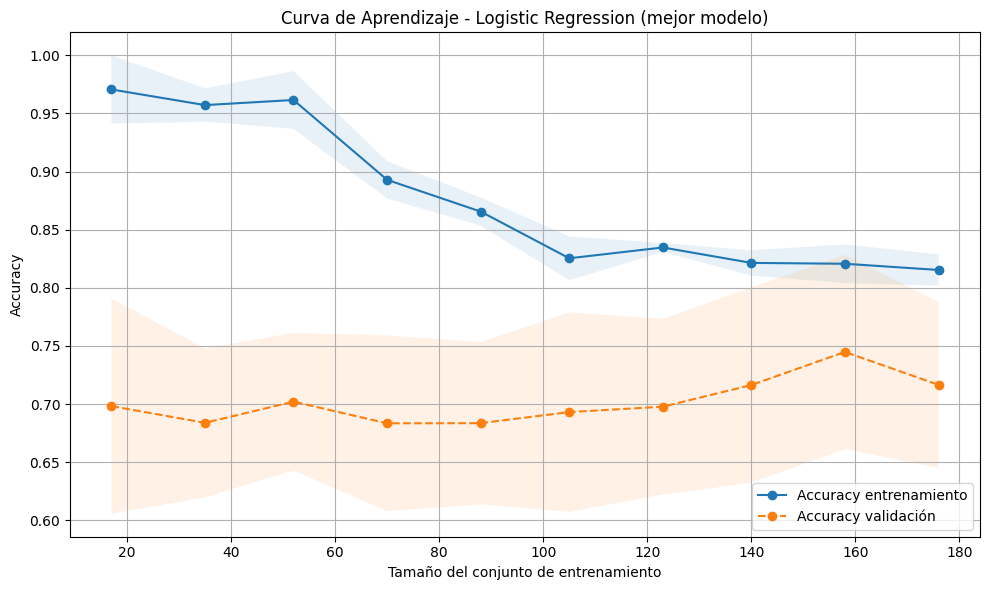

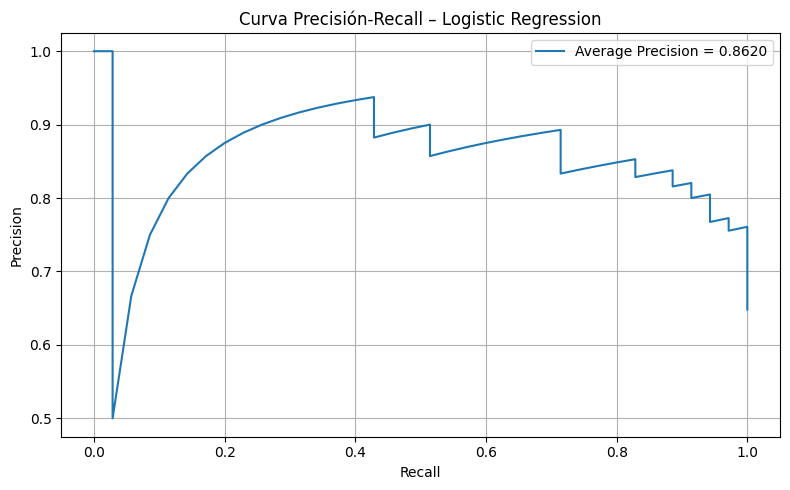

In [87]:

# === 2. Definir estrategia de validación cruzada ===
cv_strategy = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=100,
        random_state=42
    
    )
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear'],
    
    # --- Otros a probar ---
    # 'logisticregression__C': np.logspace(-3, 3, 7),
    # 'logisticregression__penalty': ['l1', 'l2'],
    # 'logisticregression__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv_acc = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=8):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


la siguiente no me gusta la validacion cruzada

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7778
Test F1 Score: 0.7778
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.6842    0.6842    0.6842        19
           1     0.8286    0.8286    0.8286        35

    accuracy                         0.7778        54
   macro avg     0.7564    0.7564    0.7564        54
weighted avg     0.7778    0.7778    0.7778        54

=== Matriz de confusión ===
[[13  6]
 [ 6 29]]

Validación cruzada (cv=8):
Accuracy promedio: 0.7311 ± 0.0337
F1 Score promedio: 0.7215 ± 0.0335


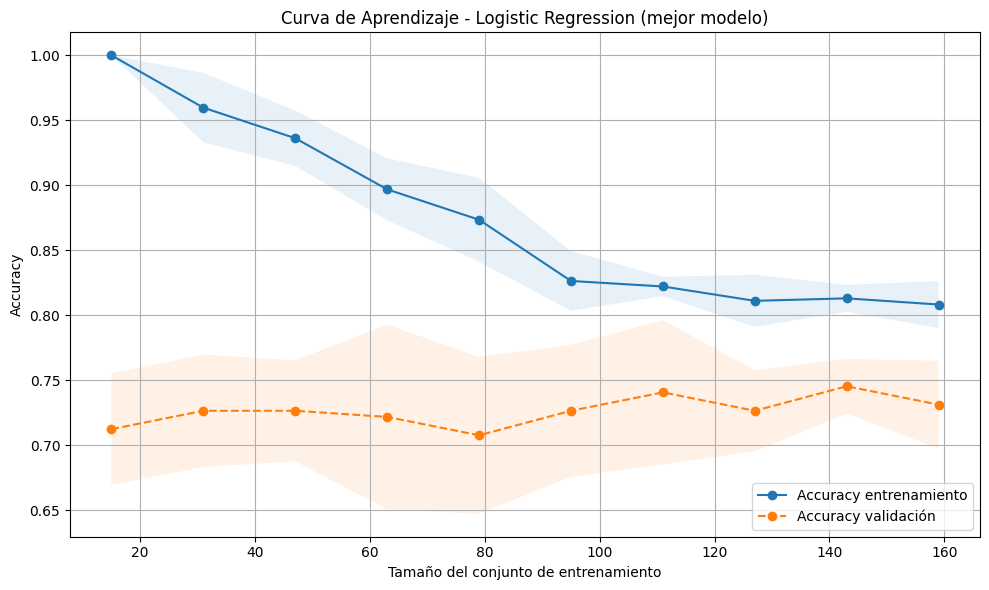

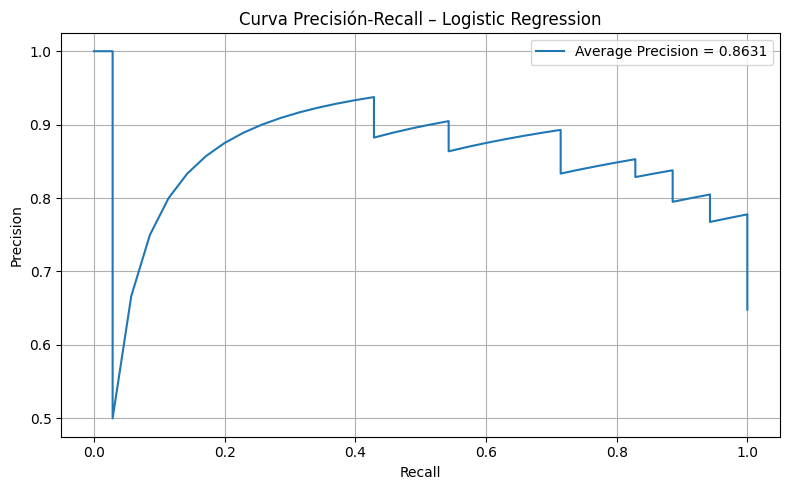

In [82]:

# === 2. Definir estrategia de validación cruzada ===
cv_strategy = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=100,
        random_state=42
    
    )
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs'],
    
    # --- Otros a probar ---
    # 'logisticregression__C': np.logspace(-3, 3, 7),
    # 'logisticregression__penalty': ['l1', 'l2'],
    # 'logisticregression__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv_acc = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=8):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


l de abajo esta decente

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7407
Test F1 Score: 0.7452
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.6087    0.7368    0.6667        19
           1     0.8387    0.7429    0.7879        35

    accuracy                         0.7407        54
   macro avg     0.7237    0.7398    0.7273        54
weighted avg     0.7578    0.7407    0.7452        54

=== Matriz de confusión ===
[[14  5]
 [ 9 26]]

Validación cruzada (cv=5):
Accuracy promedio: 0.7406 ± 0.0601
F1 Score promedio: 0.7359 ± 0.0597


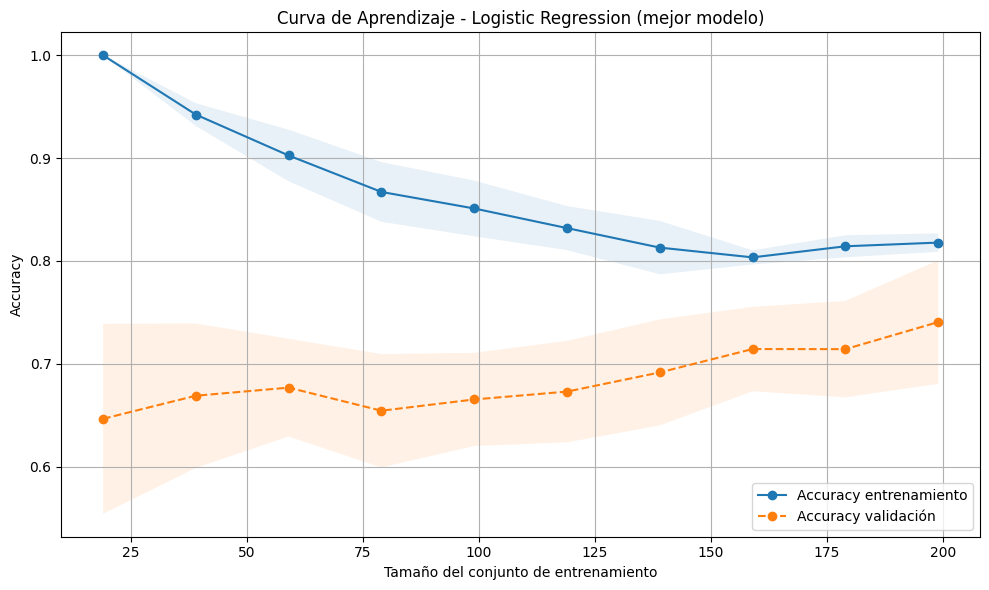

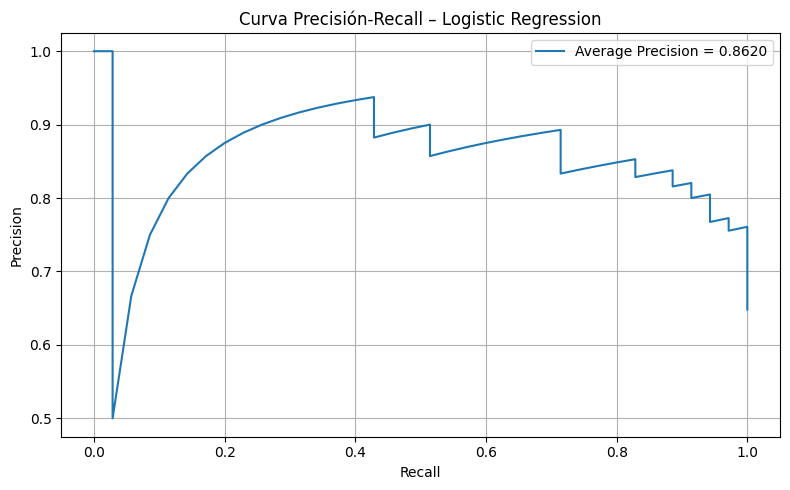

In [119]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100, random_state=42
    )
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # valores típicos para regularización
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear'],  # 'liblinear' es bueno para datasets pequeños, 'saga' para grandes
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=4,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 6 folds for each of 5 candidates, totalling 30 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7963
Test F1 Score: 0.7877
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.7857    0.5789    0.6667        19
           1     0.8000    0.9143    0.8533        35

    accuracy                         0.7963        54
   macro avg     0.7929    0.7466    0.7600        54
weighted avg     0.7950    0.7963    0.7877        54

=== Matriz de confusión ===
[[11  8]
 [ 3 32]]

Validación cruzada (cv=5):
Accuracy promedio: 0.7330 ± 0.0247
F1 Score promedio: 0.7120 ± 0.0261


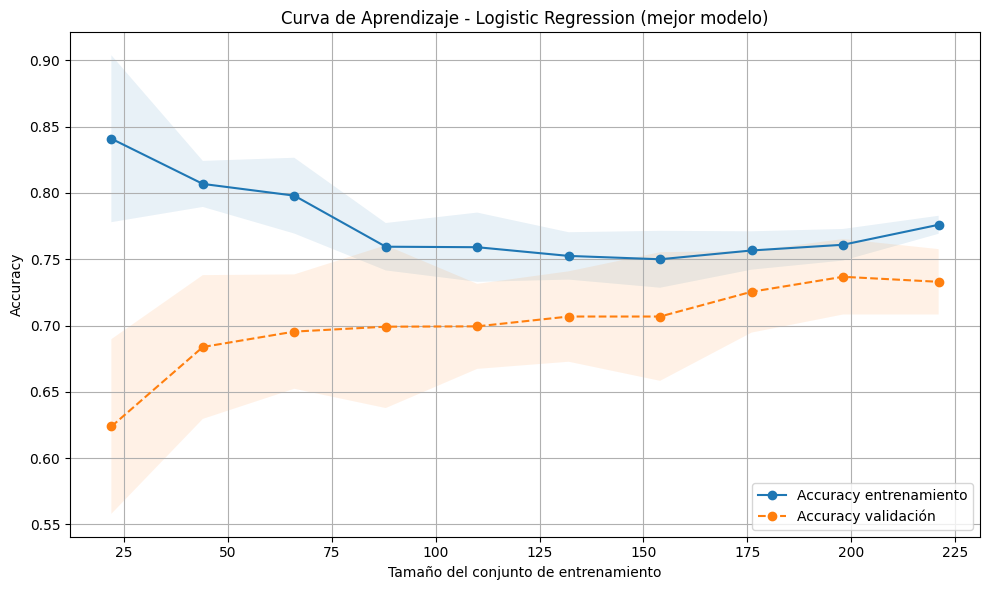

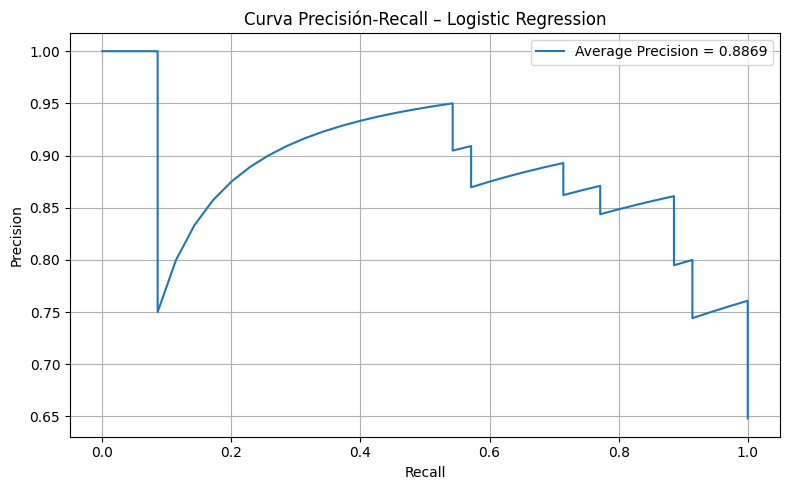

In [129]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100, random_state=42
    )
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # valores típicos para regularización
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs'],  # 'liblinear' es bueno para datasets pequeños, 'saga' para grandes
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=6,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

preguntar a andres

Fitting 6 folds for each of 6 candidates, totalling 36 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7222
Test F1 Score: 0.7275
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5667    0.8947    0.6939        19
           1     0.9167    0.6286    0.7458        35

    accuracy                         0.7222        54
   macro avg     0.7417    0.7617    0.7198        54
weighted avg     0.7935    0.7222    0.7275        54

=== Matriz de confusión ===
[[17  2]
 [13 22]]

Validación cruzada (cv=5):
Accuracy promedio: 0.7158 ± 0.0512
F1 Score promedio: 0.7203 ± 0.0497


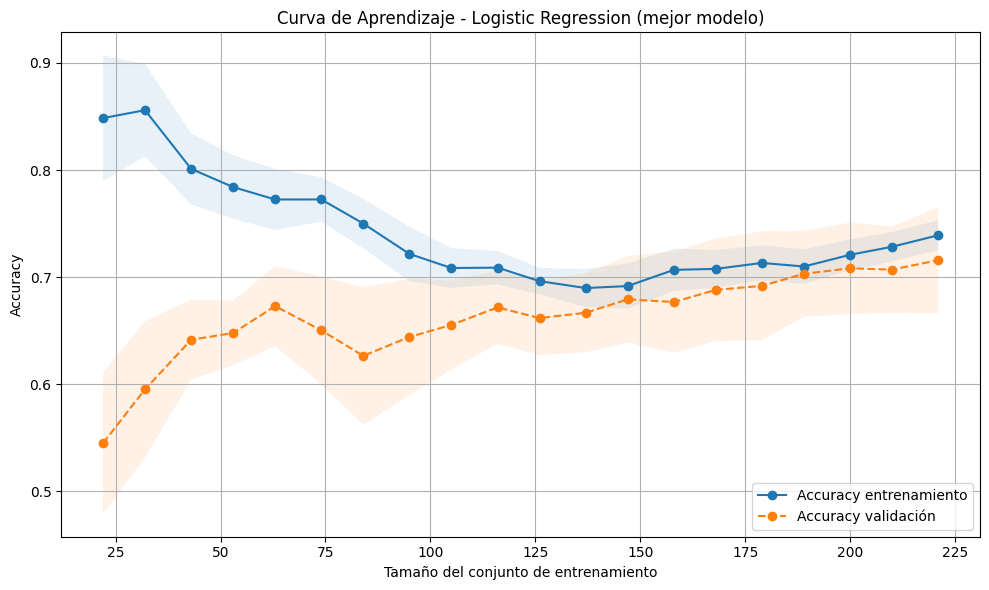

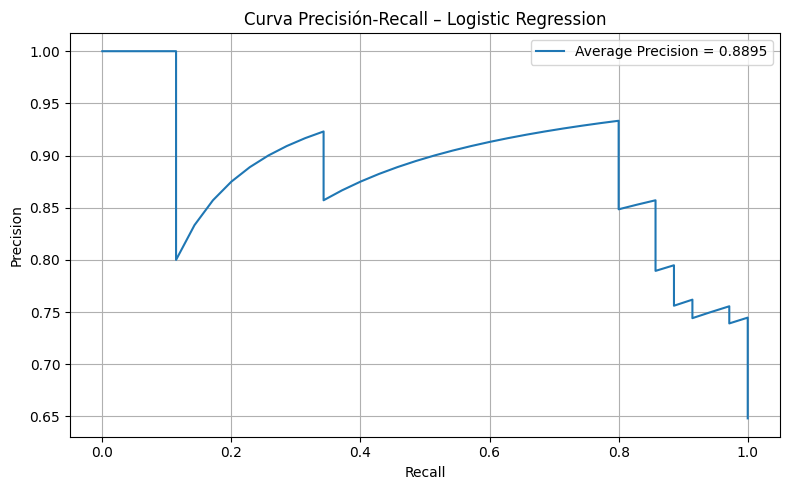

In [132]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100, random_state=42
    )
)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # valores típicos para regularización
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear'],  # 'liblinear' es bueno para datasets pequeños, 'saga' para grandes
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=6,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 6 folds for each of 6 candidates, totalling 36 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7222
Test F1 Score: 0.7275
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5667    0.8947    0.6939        19
           1     0.9167    0.6286    0.7458        35

    accuracy                         0.7222        54
   macro avg     0.7417    0.7617    0.7198        54
weighted avg     0.7935    0.7222    0.7275        54

=== Matriz de confusión ===
[[17  2]
 [13 22]]

Validación cruzada (cv=5):
Accuracy promedio: 0.6995 ± 0.0605
F1 Score promedio: 0.7048 ± 0.0589


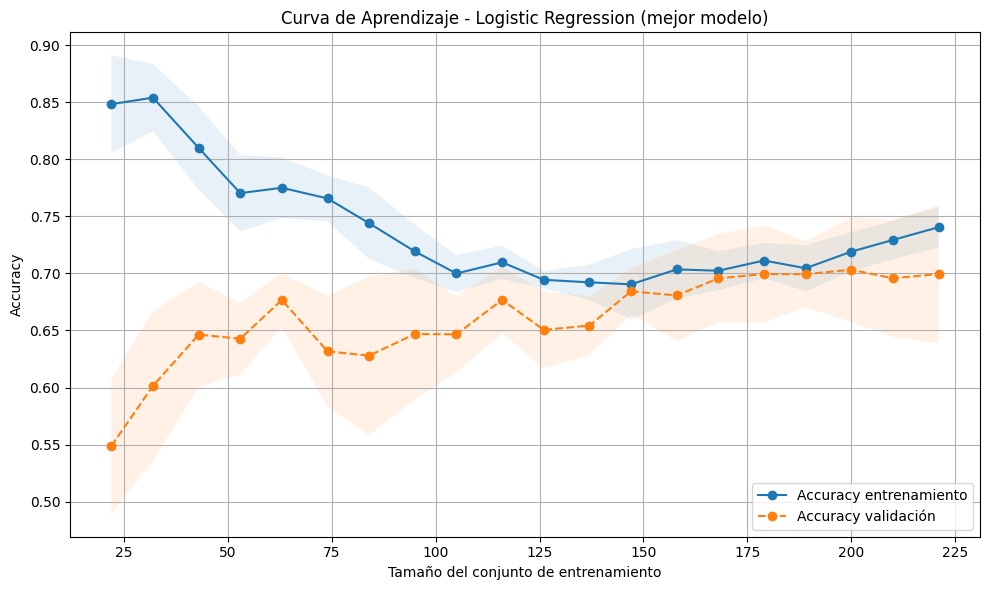

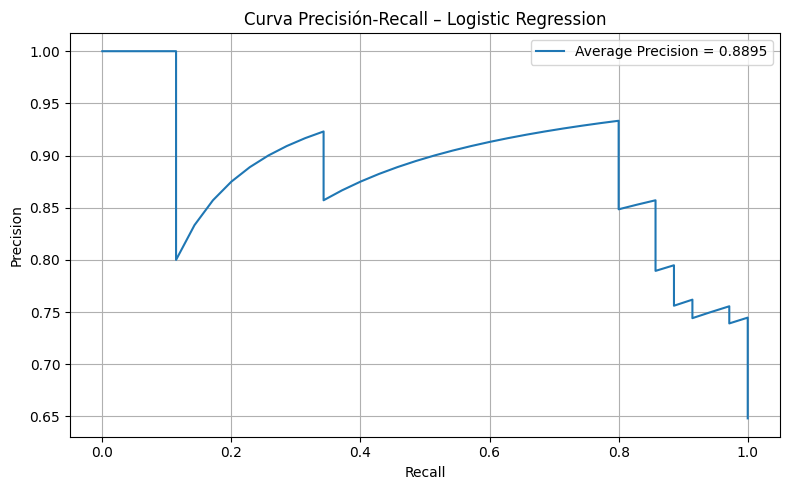

In [126]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=100, random_state=42
    )
)

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # valores típicos para regularización
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear'],  # 'liblinear' es bueno para datasets pequeños, 'saga' para grandes
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=6,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=cv, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 20), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# === 9. Importancia de variables (coeficientes absolutos) ===
# Extraer el modelo entrenado desde el pipeline
modelo_lr = best_model.named_steps['logisticregression']
scaler = best_model.named_steps['standardscaler']

# Obtener coeficientes (ya escalados)
importancias = pd.Series(
    np.abs(modelo_lr.coef_[0]),
    index=X.columns
).sort_values(ascending=False)

print("\n=== Importancia de Variables (Logistic Regression) ===")
#bucle para verlas todas
for variable, importancia in importancias.items():
    print(f"{variable}: {importancia:.4f}")
# # Visualización
# plt.figure(figsize=(10, 8))
# importancias.plot(kind='barh')
# plt.title("Importancia de Variables – Regresión Logística")
# plt.xlabel("Importancia (valor absoluto del coeficiente)")
# plt.ylabel("Variable")
# plt.gca().invert_yaxis()
# plt.grid(True, axis='x', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()



=== Importancia de Variables (Logistic Regression) ===
2_Elo: 0.1308
2_hElo: 0.1274
2_Rk: 0.0922
1_vAce%: 0.0904
1_hElo: 0.0890
1_Elo: 0.0757
2_vAce%: 0.0751
2_MdOppRk: 0.0717
1_v1st%: 0.0660
1_Rk: 0.0593
1_TB W%: 0.0587
2_MnOppRk: 0.0583
2_Pts/RG: 0.0549
1_BPConv%: 0.0512
2_Bks/M: 0.0472
1_BPvs/M: 0.0459
2_M: 0.0453
1_BPSvd%: 0.0445
2_vDF%: 0.0434
1_Pts/RG: 0.0421
1_Pts/SG: 0.0403
2_BPChnc: 0.0394
2_BPSvd%: 0.0383
1_M W%: 0.0374
2_S W%: 0.0369
1_BPvs/G: 0.0352
2_BPConv%: 0.0350
1_2%-InP: 0.0340
2_Hld%: 0.0332
2_Bks/S: 0.0324
1_RPW: 0.0320
2_BPvs/G: 0.0317
1_S W%: 0.0315
1_SPW-InP: 0.0297
2_TB W%: 0.0293
1_BPvs/S: 0.0284
2_TPW%: 0.0283
2_v2nd%: 0.0279
2_1st%: 0.0254
2_SPW: 0.0246
1_1stIn: 0.0240
1_TPW%: 0.0230
1_2nd%: 0.0225
2_BP/M: 0.0222
2_Bkn/S: 0.0216
1_Ace%: 0.0209
1_Bks/S: 0.0208
2_SPW-InP: 0.0200
2_DF%: 0.0194
1_DF/2s: 0.0189
2_Bkn/M: 0.0189
1_M: 0.0176
2_DF/2s: 0.0172
2_Pts/SG: 0.0171
1_BP/S: 0.0170
2_2nd%: 0.0164
2_RPW-InP: 0.0162
2_M W%: 0.0150
1_SPW: 0.0147
1_Bks/M: 0.0146


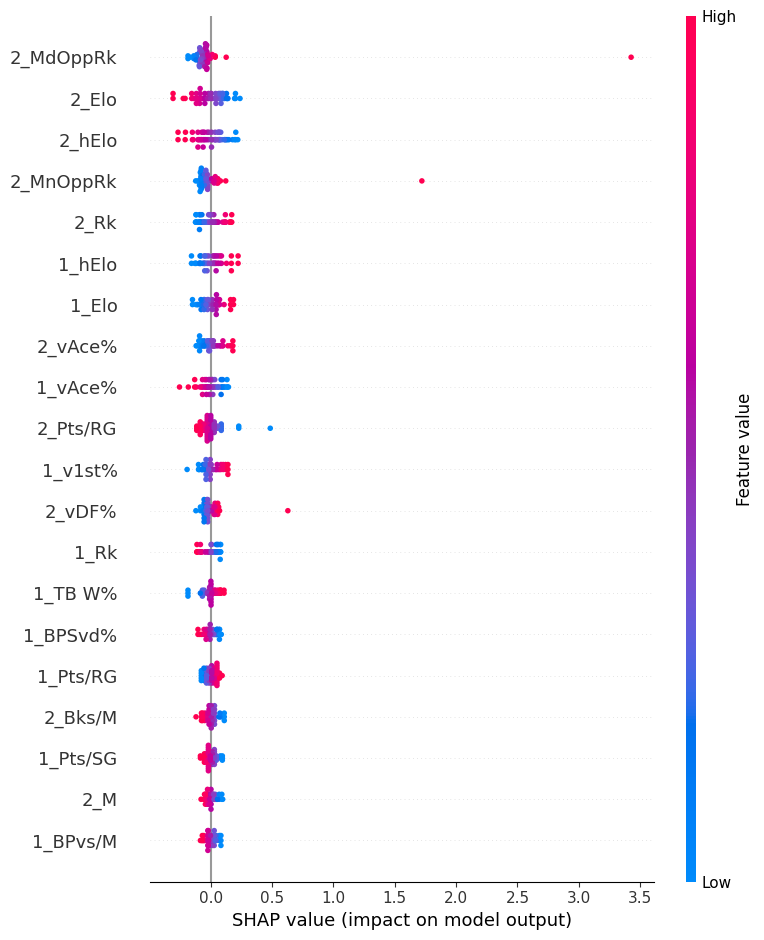

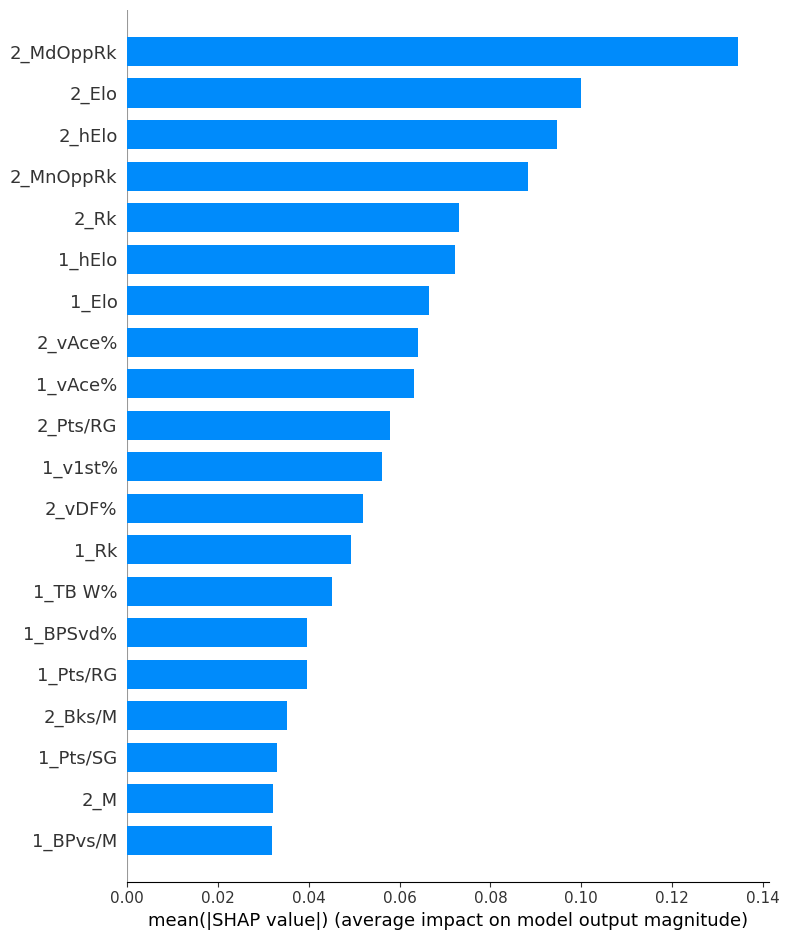

In [72]:

# === Preparar el explainer de SHAP para regresión logística ===
# Extraer modelo y scaler del pipeline
model_lr = best_model.named_steps['logisticregression']
scaler = best_model.named_steps['standardscaler']

# Transformar manualmente X_test para pasar al modelo
X_test_scaled = scaler.transform(X_test)

# Crear el explainer de SHAP (para modelos lineales como Logistic Regression)
explainer = shap.Explainer(model_lr, X_test_scaled, feature_names=X.columns)

# Calcular los valores SHAP
shap_values = explainer(X_test_scaled)

# === Visualización de resumen global ===
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X.columns)

# (Opcional) === Visualización tipo bar chart ===
shap.summary_plot(shap_values, features=X_test_scaled, feature_names=X.columns, plot_type="bar")


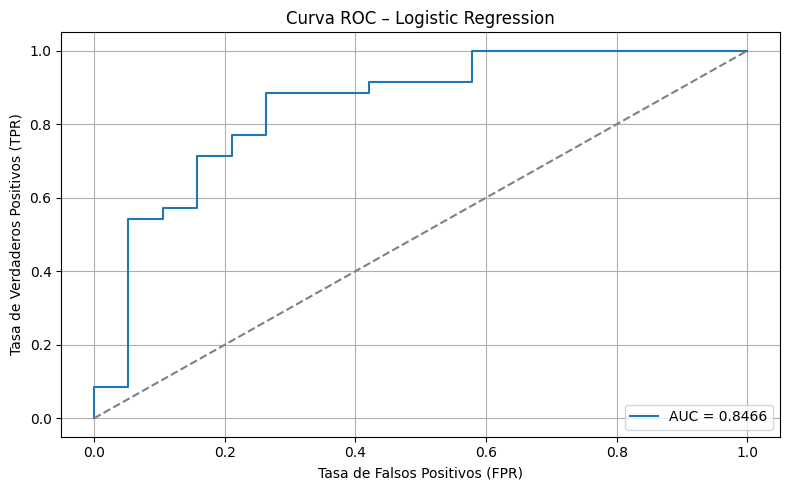

In [73]:
# === 9. Curva ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # línea aleatoria
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC – Logistic Regression")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 6 folds for each of 12 candidates, totalling 72 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.1}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7963
Test F1 Score: 0.7877
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.7857    0.5789    0.6667        19
           1     0.8000    0.9143    0.8533        35

    accuracy                         0.7963        54
   macro avg     0.7929    0.7466    0.7600        54
weighted avg     0.7950    0.7963    0.7877        54

=== Matriz de confusión ===
[[11  8]
 [ 3 32]]

Validación cruzada (cv=5):
Accuracy promedio: 0.7257 ± 0.0335
F1 Score promedio: 0.7031 ± 0.0425


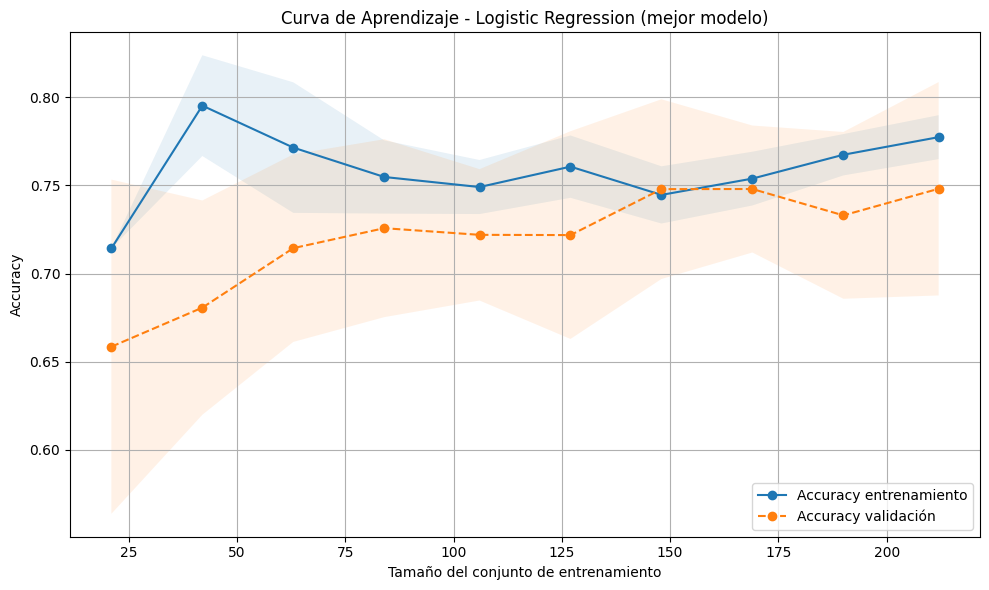

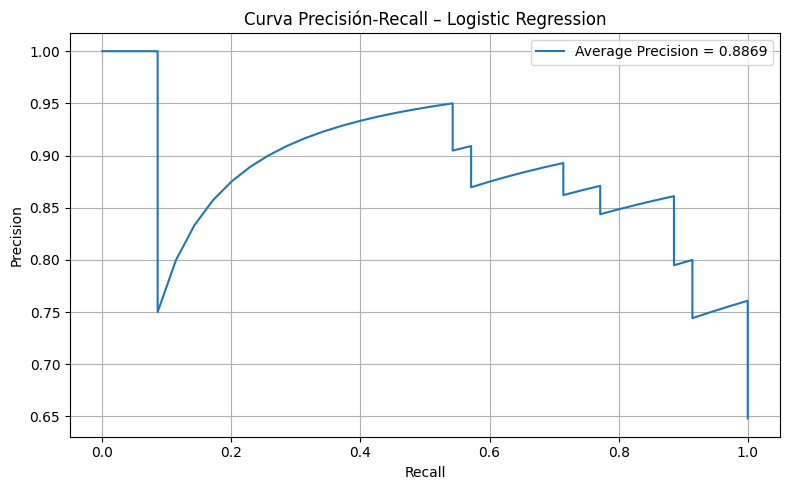

In [110]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression( solver='lbfgs', max_iter=1000, random_state=42)
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__l1_ratio': [0.1, 0.5, 0.9],  # mezcla entre L1 y L2
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=6,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
modelo_lr = best_model.named_steps['logisticregression']
scaler = best_model.named_steps['standardscaler']

# Obtener coeficientes (ya escalados)
importancias = pd.Series(
    np.abs(modelo_lr.coef_[0]),
    index=X.columns
).sort_values(ascending=False)

print("\n=== Importancia de Variables (Logistic Regression) ===")
#bucle para verlas todas
for variable, importancia in importancias.items():
    print(f"{variable}: {importancia:.4f}")


=== Importancia de Variables (Logistic Regression) ===
2_hElo: 0.5818
1_hElo: 0.5543
2_Elo: 0.3239
1_vAce%: 0.0851
2_vAce%: 0.0134
1_TB W%: 0.0108
1_v1st%: 0.0065
1_M W%: 0.0000
1_M: 0.0000
1_Ace%: 0.0000
1_1st%: 0.0000
1_2nd%: 0.0000
1_SPW-InP: 0.0000
1_SPW: 0.0000
1_DF%: 0.0000
1_DF/2s: 0.0000
1_1stIn: 0.0000
1_Rk: 0.0000
1_vDF%: 0.0000
1_RPW-InP: 0.0000
1_RPW: 0.0000
1_Pts/SG: 0.0000
1_2%-InP: 0.0000
1_Hld%: 0.0000
1_MnOppRk: 0.0000
1_v2nd%: 0.0000
1_BP/S: 0.0000
1_BP/M: 0.0000
1_Bks/S: 0.0000
1_Bks/M: 0.0000
1_BPSvd%: 0.0000
1_BPConv%: 0.0000
1_Pts/RG: 0.0000
1_MdOppRk: 0.0000
1_BPvs/M: 0.0000
1_BPvs/S: 0.0000
1_Bkn/M: 0.0000
1_Bkn/S: 0.0000
1_TPW%: 0.0000
1_S W%: 0.0000
1_Elo: 0.0000
2_Rk: 0.0000
2_M: 0.0000
2_M W%: 0.0000
2_SPW: 0.0000
2_SPW-InP: 0.0000
2_Ace%: 0.0000
1_BPvs/G: 0.0000
1_BPChnc: 0.0000
1_BP/G: 0.0000
2_1stIn: 0.0000
2_DF/2s: 0.0000
2_DF%: 0.0000
2_1st%: 0.0000
2_Hld%: 0.0000
2_Pts/SG: 0.0000
2_2%-InP: 0.0000
2_2nd%: 0.0000
2_vDF%: 0.0000
2_v1st%: 0.0000
2_v2nd%: 

Fitting 6 folds for each of 5 candidates, totalling 30 fits
Mejor combinación de hiperparámetros:
{'logisticregression__C': 0.01, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}

Resultados del mejor modelo Logistic Regression (en test):
Test Accuracy: 0.7037
Test F1 Score: 0.7099
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5517    0.8421    0.6667        19
           1     0.8800    0.6286    0.7333        35

    accuracy                         0.7037        54
   macro avg     0.7159    0.7353    0.7000        54
weighted avg     0.7645    0.7037    0.7099        54

=== Matriz de confusión ===
[[16  3]
 [13 22]]

Validación cruzada (cv=5):
Accuracy promedio: 0.7180 ± 0.0340
F1 Score ponderado promedio: 0.7209 ± 0.0333
Recall promedio: 0.7408
F1 Macro promedio: 0.7019


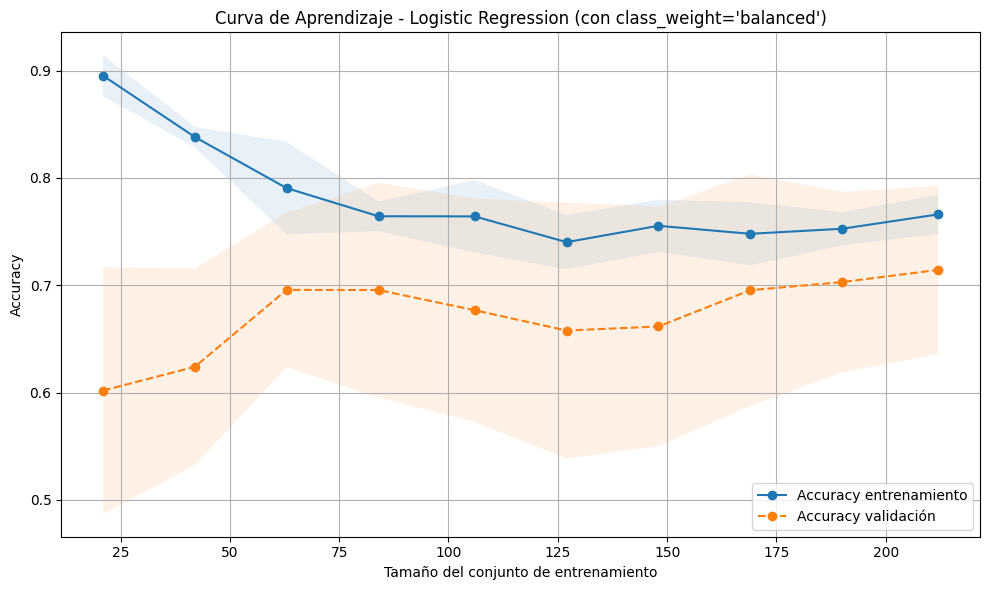

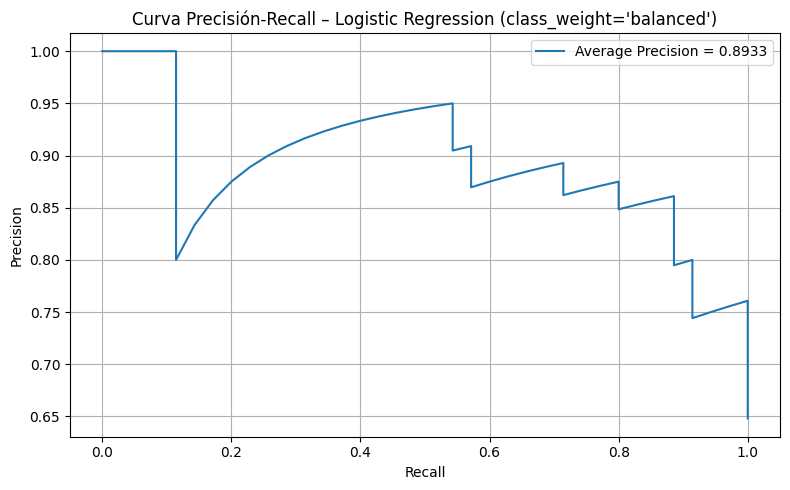

In [114]:
# === 3. Definir pipeline y parámetros para GridSearch ===
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs'],
    'logisticregression__class_weight': ['balanced']  # <-- NUEVO
}

grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=6,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar GridSearch ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

# === 5. Evaluación en test con el mejor modelo ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados del mejor modelo Logistic Regression (en test):")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 6. Validación cruzada con el mejor modelo ===
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted', n_jobs=-1)
cv_recall = cross_val_score(best_model, X, y, cv=cv, scoring='recall', n_jobs=-1)
cv_f1_macro = cross_val_score(best_model, X, y, cv=cv, scoring='f1_macro', n_jobs=-1)

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score ponderado promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")
print(f"Recall promedio: {cv_recall.mean():.4f}")
print(f"F1 Macro promedio: {cv_f1_macro.mean():.4f}")

# === 7. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (con class_weight='balanced')")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Logistic Regression (class_weight='balanced')")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
modelo_lr = best_model.named_steps['logisticregression']
scaler = best_model.named_steps['standardscaler']

# Obtener coeficientes (ya escalados)
importancias = pd.Series(
    np.abs(modelo_lr.coef_[0]),
    index=X.columns
).sort_values(ascending=False)

print("\n=== Importancia de Variables (Logistic Regression) ===")
#bucle para verlas todas
for variable, importancia in importancias.items():
    print(f"{variable}: {importancia:.4f}")


=== Importancia de Variables (Logistic Regression) ===
1_hElo: 1.3834
2_hElo: 1.3232
2_Elo: 0.7340
2_BPvs/G: 0.6888
1_Pts/RG: 0.6505
2_BP/S: 0.6214
2_v2nd%: 0.5935
2_Bks/M: 0.5843
1_BPvs/M: 0.5602
1_BPSvd%: 0.5570
1_BPvs/G: 0.5308
1_BPChnc: 0.4995
2_RPW-InP: 0.4922
2_Rk: 0.4690
2_BPvs/S: 0.4677
1_BP/S: 0.4638
1_TB W%: 0.4378
1_BP/G: 0.4375
2_BP/G: 0.4205
1_BPConv%: 0.4163
2_vAce%: 0.4097
1_MdOppRk: 0.3909
1_S W%: 0.3828
2_BPChnc: 0.3795
1_BP/M: 0.3775
1_Rk: 0.3434
2_Bkn/S: 0.3434
1_Bkn/M: 0.3391
2_TB W%: 0.3289
1_1st%: 0.3283
2_M: 0.3129
2_Pts/RG: 0.2963
2_BPSvd%: 0.2904
1_v2nd%: 0.2847
2_Bks/S: 0.2766
1_M W%: 0.2646
1_vAce%: 0.2636
2_1st%: 0.2529
2_RPW: 0.2506
1_Bkn/S: 0.2501
2_S W%: 0.2448
2_DF%: 0.2419
1_v1st%: 0.2116
2_M W%: 0.1947
1_M: 0.1924
2_Bkn/M: 0.1739
2_Hld%: 0.1736
1_2%-InP: 0.1617
2_Pts/SG: 0.1564
1_Elo: 0.1521
2_MdOppRk: 0.1508
1_vDF%: 0.1482
2_2nd%: 0.1457
1_MnOppRk: 0.1319
1_1stIn: 0.1241
1_DF/2s: 0.1196
2_Ace%: 0.1191
2_vDF%: 0.1111
2_BPvs/M: 0.1107
1_BPvs/S: 0.1029


Resultados del modelo Random Forest
Accuracy: 0.6852
F1 Score: 0.6897

=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5455    0.6316    0.5854        19
           1     0.7812    0.7143    0.7463        35

    accuracy                         0.6852        54
   macro avg     0.6634    0.6729    0.6658        54
weighted avg     0.6983    0.6852    0.6897        54

=== Matriz de confusión ===
[[12  7]
 [10 25]] 



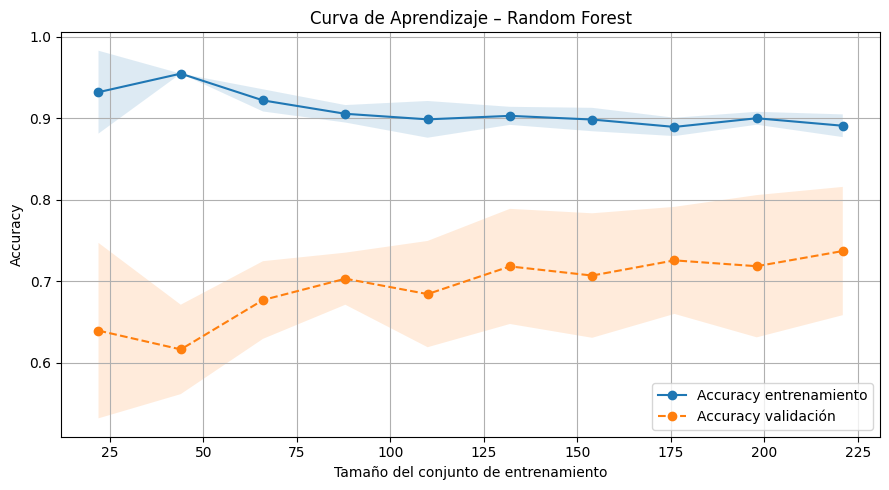

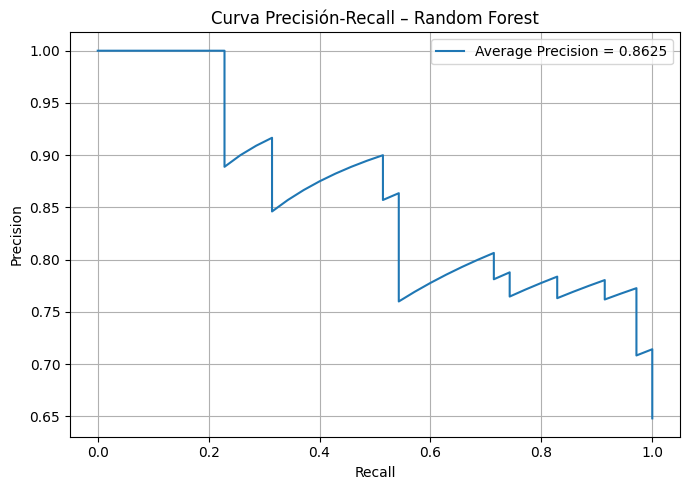


=== Variables más importantes ===
2_Elo      0.0594
2_hElo     0.0520
1_Elo      0.0472
2_Rk       0.0367
1_hElo     0.0346
            ...  
1_Bkn/M    0.0037
1_BP/M     0.0035
2_vDF%     0.0035
2_BP/G     0.0024
1_DF%      0.0024
Length: 82, dtype: float64


In [105]:
# === 2. Separar variables y objetivo ===
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']

# === 3. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# === 4. Entrenar Random Forest ===
rf = RandomForestClassifier(
    n_estimators=150,         # Menos árboles = menor complejidad (ajustable)
    max_depth=6,              # Limita la profundidad del árbol → evita ramas muy especializadas
    min_samples_split=10,     # Al menos 10 ejemplos para dividir un nodo
    min_samples_leaf=5,       # Al menos 5 ejemplos por hoja → evita nodos frágiles
    max_features='sqrt',      # Usa solo sqrt(n_features) en cada split (reduce varianza)
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# === 5. Evaluación en test ===
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo Random Forest")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva de aprendizaje (learning curve) ===
train_sizes, train_scores, val_scores = learning_curve(
    rf, X, y,
    cv=6,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(9, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva Precisión-Recall ===
y_proba = rf.predict_proba(X_test)[:, 1]          # prob. clase positiva
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Importancia de variables (opcional) ===
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Variables más importantes ===")
print(importances.round(4))

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_acc = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
rf_f1 = cross_val_score(rf, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Random Forest")
print(f"   Accuracy promedio: {rf_acc.mean():.4f} ± {rf_acc.std():.4f}")
print(f"   F1 Score promedio: {rf_f1.mean():.4f} ± {rf_f1.std():.4f}")

🔹 Random Forest
   Accuracy promedio: 0.7106 ± 0.0252
   F1 Score promedio: 0.7969 ± 0.0147


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejor combinación de hiperparámetros:
{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

 Resultados del mejor modelo Random Forest
Accuracy: 0.6667
F1 Score: 0.6701
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5238    0.5789    0.5500        19
           1     0.7576    0.7143    0.7353        35

    accuracy                         0.6667        54
   macro avg     0.6407    0.6466    0.6426        54
weighted avg     0.6753    0.6667    0.6701        54

=== Matriz de confusión ===
[[11  8]
 [10 25]]


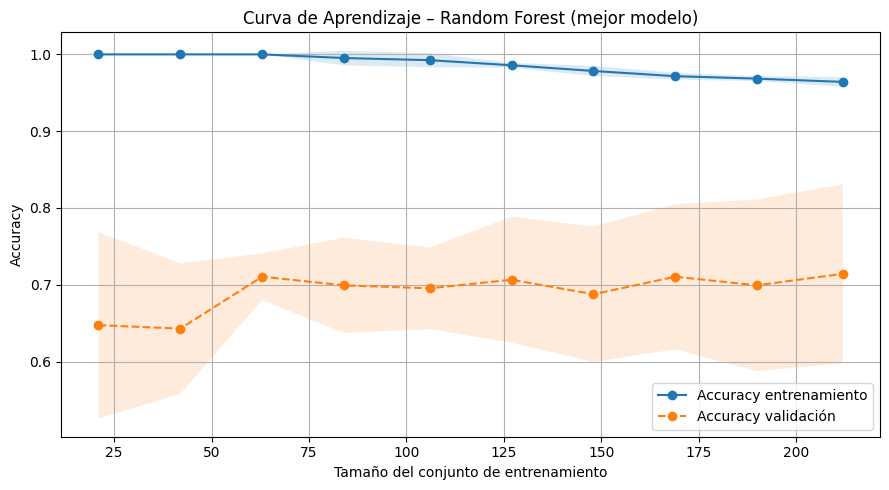

🔹 Random Forest (mejor modelo)
   Accuracy promedio: 0.7068 ± 0.0254
   F1 Score promedio: 0.7903 ± 0.0169


In [21]:
# === 1. Definir espacio de búsqueda ===
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 6, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# === 2. Crear objeto base (sin ajustar manualmente)
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

# === 3. GridSearchCV con validación cruzada (5-fold)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',   # Puedes cambiar a 'accuracy' si prefieres
    n_jobs=-1,
    verbose=1
)

# === 4. Entrenar ===
grid_search.fit(X_train, y_train)

# === 5. Mostrar mejor combinación
print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)


best_rf = grid_search.best_estimator_

# === Evaluación en test ===
y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average='weighted')

print("\n Resultados del mejor modelo Random Forest")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === Curva de aprendizaje (learning curve) ===
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)
plt.figure(figsize=(9, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – Random Forest (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#validación cruzada
rf_acc = cross_val_score(best_rf, X, y, cv=cv, scoring='accuracy')
rf_f1 = cross_val_score(best_rf, X, y, cv=cv, scoring=make_scorer(f1_score))
print("🔹 Random Forest (mejor modelo)")
print(f"   Accuracy promedio: {rf_acc.mean():.4f} ± {rf_acc.std():.4f}")
print(f"   F1 Score promedio: {rf_f1.mean():.4f} ± {rf_f1.std():.4f}")



Resultados del modelo XGBoost
Accuracy: 0.7037
F1 Score: 0.7088
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5652    0.6842    0.6190        19
           1     0.8065    0.7143    0.7576        35

    accuracy                         0.7037        54
   macro avg     0.6858    0.6992    0.6883        54
weighted avg     0.7216    0.7037    0.7088        54

=== Matriz de confusión ===
[[13  6]
 [10 25]] 



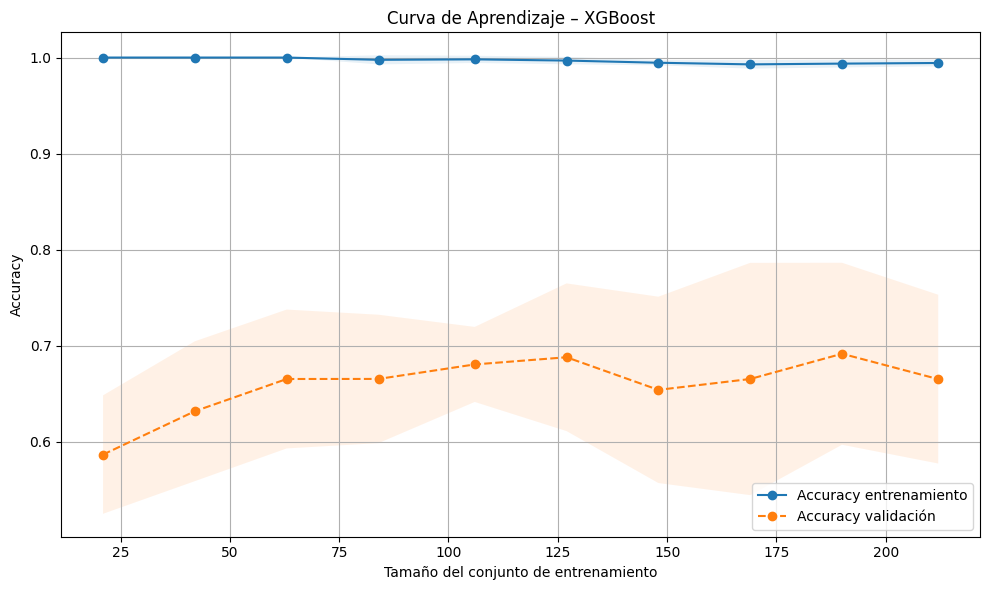

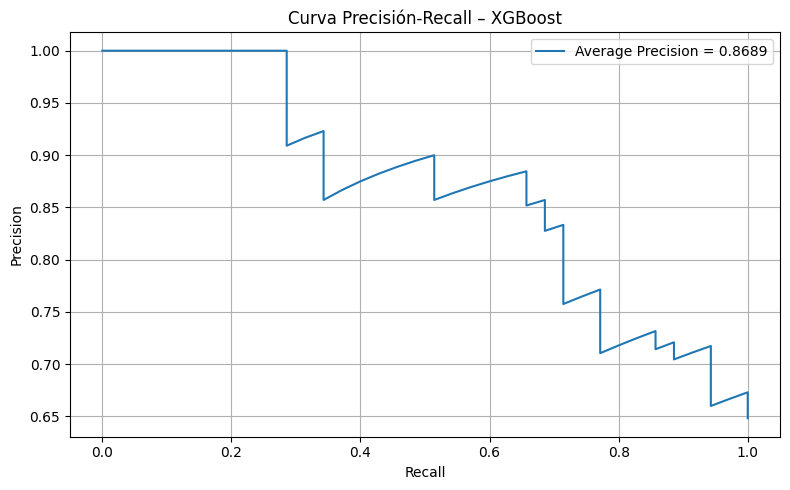

In [22]:
# === 3. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# === 4. Entrenar modelo XGBoost ===
xgb = XGBClassifier(
    n_estimators=150,
    random_state=42
)
xgb.fit(X_train, y_train)

# === 5. Evaluación en test ===
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo XGBoost")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    xgb, X, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva precisión-recall ===
y_proba = xgb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
xgb_acc = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')
xgb_f1 = cross_val_score(xgb, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 XGBoost")
print(f"   Accuracy promedio: {xgb_acc.mean():.4f} ± {xgb_acc.std():.4f}")
print(f"   F1 Score promedio: {xgb_f1.mean():.4f} ± {xgb_f1.std():.4f}")

🔹 XGBoost
   Accuracy promedio: 0.6542 ± 0.0303
   F1 Score promedio: 0.7319 ± 0.0273


Resultados del modelo SVM (normalizado + balanceado)
Accuracy: 0.7037
F1 Score: 0.7088
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5652    0.6842    0.6190        19
           1     0.8065    0.7143    0.7576        35

    accuracy                         0.7037        54
   macro avg     0.6858    0.6992    0.6883        54
weighted avg     0.7216    0.7037    0.7088        54

=== Matriz de confusión ===
[[13  6]
 [10 25]] 



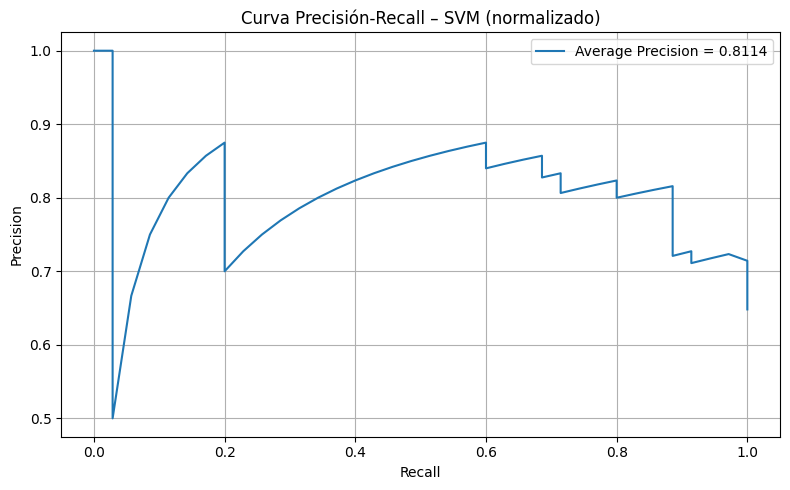

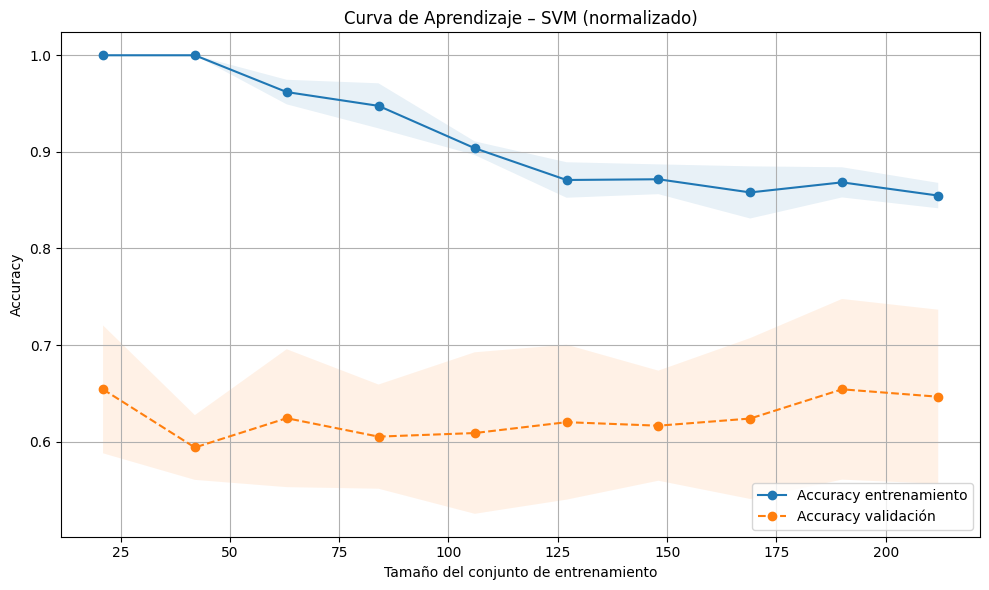

In [24]:
# === 2. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Normalización ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# === 4. Entrenar SVM con balanceo y kernel lineal ===
model = SVC(kernel='linear', C=1.0, class_weight='balanced', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# === 5. Evaluar ===
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo SVM (normalizado + balanceado)")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva Precisión-Recall ===
y_proba = model.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – SVM (normalizado)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva de Aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    model, X_scaled, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – SVM (normalizado)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# === 2. Definir modelo con pipeline (normalización + SVM balanceado) ===
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
)

# === 3. Validación cruzada (cv=5 estratificada) ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 4. Calcular accuracy y F1-score con cross_val_score ===
acc_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring=make_scorer(f1_score))

# === 5. Mostrar resultados ===
print("Validación cruzada (SVM con normalización y class_weight='balanced')")
print(f"Accuracy promedio: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
print(f"F1 Score promedio: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

Validación cruzada (SVM con normalización y class_weight='balanced')
Accuracy promedio: 0.6428 ± 0.0431
F1 Score promedio: 0.7042 ± 0.0453


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejor combinación de hiperparámetros:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Resultados en test:
Accuracy: 0.6296
F1 Score: 0.6334
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.4762    0.5263    0.5000        19
           1     0.7273    0.6857    0.7059        35

    accuracy                         0.6296        54
   macro avg     0.6017    0.6060    0.6029        54
weighted avg     0.6389    0.6296    0.6334        54

=== Matriz de confusión ===
[[10  9]
 [11 24]]

Validación cruzada (cv=5):
Accuracy promedio: 0.6466 ± 0.0384
F1 Score promedio: 0.6347 ± 0.0455


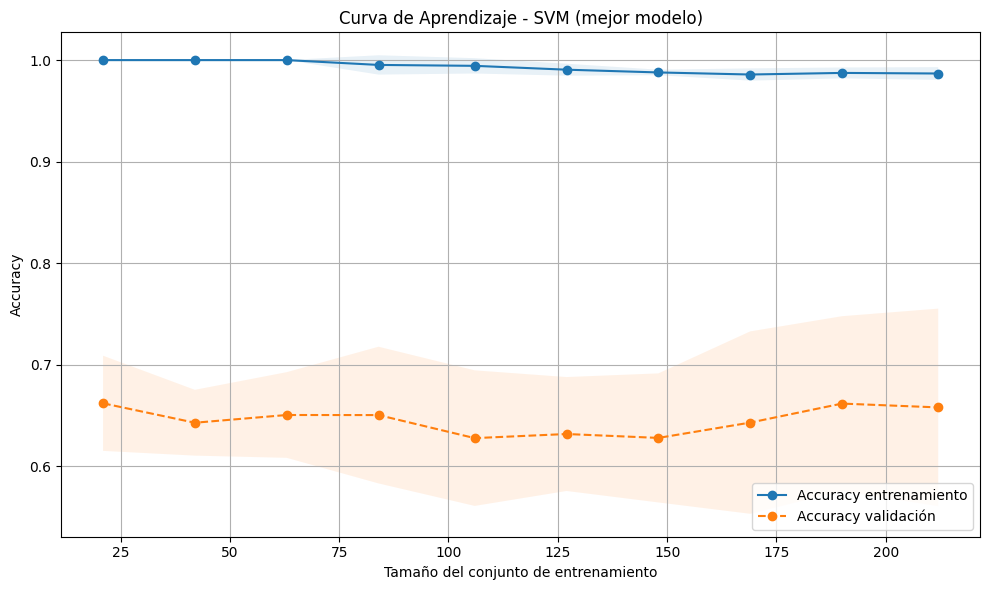

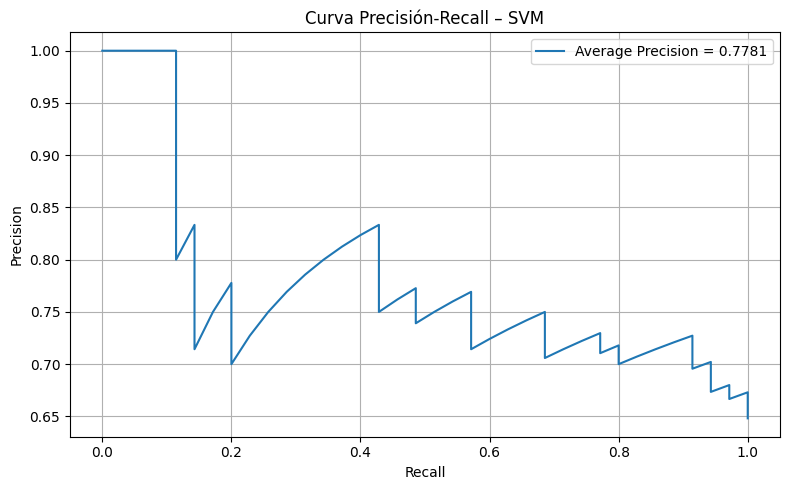

In [25]:
# === 2. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Pipeline SVM + normalización ===
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(probability=True, random_state=42)
)

# === 4. GridSearchCV para optimizar C, kernel y gamma ===
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === 5. Entrenar modelo ===
grid_search.fit(X_train, y_train)

print("Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# === 6. Evaluación en test ===
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nResultados en test:")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === 7. Validación cruzada ===
cv_acc = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
cv_f1 = cross_val_score(best_model, X, y, cv=cv, scoring='f1_weighted')

print("\nValidación cruzada (cv=5):")
print(f"Accuracy promedio: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score promedio: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# === 8. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - SVM (mejor modelo)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. Curva Precisión-Recall ===
y_proba = best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – SVM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()